In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


In [2]:
fashion = tf.keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion.load_data()

In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

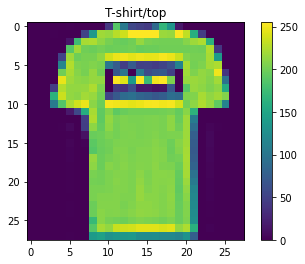

In [8]:
def show_image(x):
    plt.imshow(x_train[x]) 
    plt.title(classes[y_train[x]])
    plt.colorbar()
    plt.show()
show_image(1)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics =['accuracy'])

In [16]:
vals=model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.33)

Epoch 1/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3096 - accuracy: 0.0977 - val_loss: 2.3123 - val_accuracy: 0.1021
Epoch 2/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3092 - accuracy: 0.1005 - val_loss: 2.3057 - val_accuracy: 0.1030
Epoch 3/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3088 - accuracy: 0.1013 - val_loss: 2.3057 - val_accuracy: 0.0991
Epoch 4/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3087 - accuracy: 0.1005 - val_loss: 2.3120 - val_accuracy: 0.0992
Epoch 5/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3094 - accuracy: 0.0985 - val_loss: 2.3099 - val_accuracy: 0.0979
Epoch 6/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3090 - accuracy: 0.0993 - val_loss: 2.3124 - val_accuracy: 0.0979
Epoch 7/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3084 - accuracy: 0.1003 - val_loss: 2.3121 - val_accuracy: 0.1007

Epoch 58/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3087 - accuracy: 0.1000 - val_loss: 2.3077 - val_accuracy: 0.1030
Epoch 59/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3082 - accuracy: 0.1003 - val_loss: 2.3083 - val_accuracy: 0.0969
Epoch 60/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3085 - accuracy: 0.0990 - val_loss: 2.3089 - val_accuracy: 0.0969
Epoch 61/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3092 - accuracy: 0.0987 - val_loss: 2.3086 - val_accuracy: 0.0991
Epoch 62/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3081 - accuracy: 0.0989 - val_loss: 2.3125 - val_accuracy: 0.0998
Epoch 63/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3088 - accuracy: 0.0993 - val_loss: 2.3086 - val_accuracy: 0.0998
Epoch 64/100
315/315 [==============================] - 1s 4ms/step - loss: 2.3089 - accuracy: 0.0976 - val_loss: 2.3118 - val_accuracy:

From the above cell we find that model accuracy is 0.0989, the reason for this low accuracy is because of the learning rate being 0.1 which is very high.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


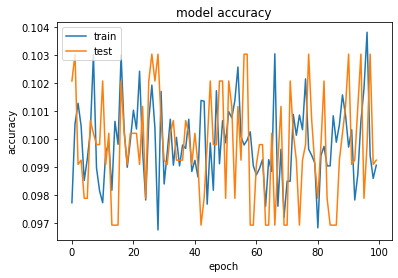

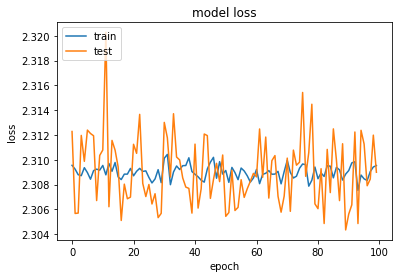

In [18]:
print(vals.history.keys())
# summarize history for accuracy
plt.plot(vals.history['accuracy'])
plt.plot(vals.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(vals.history['loss'])
plt.plot(vals.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save('MNIST_Model.h5')